<a href="https://colab.research.google.com/github/Inhusa/AI-class/blob/main/4%20week/ML_wine%20_hyperparameter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

데이터 로드

In [2]:
url = "https://raw.githubusercontent.com/Inhusa/AI-class/refs/heads/main/4%20week/wine.csv"
df = pd.read_csv(url)
df

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


결측치 유무 확인

In [4]:
df.isnull().sum()

,0
Wine,0
Alcohol,0
Malic.acid,0
Ash,0
Acl,0
Mg,0
Phenols,0
Flavanoids,0
Nonflavanoid.phenols,0
Proanth,0


결측치 제거

In [5]:
df = df.dropna()
df.isnull().sum()

,0
Wine,0
Alcohol,0
Malic.acid,0
Ash,0
Acl,0
Mg,0
Phenols,0
Flavanoids,0
Nonflavanoid.phenols,0
Proanth,0


상관관계 혼동행렬

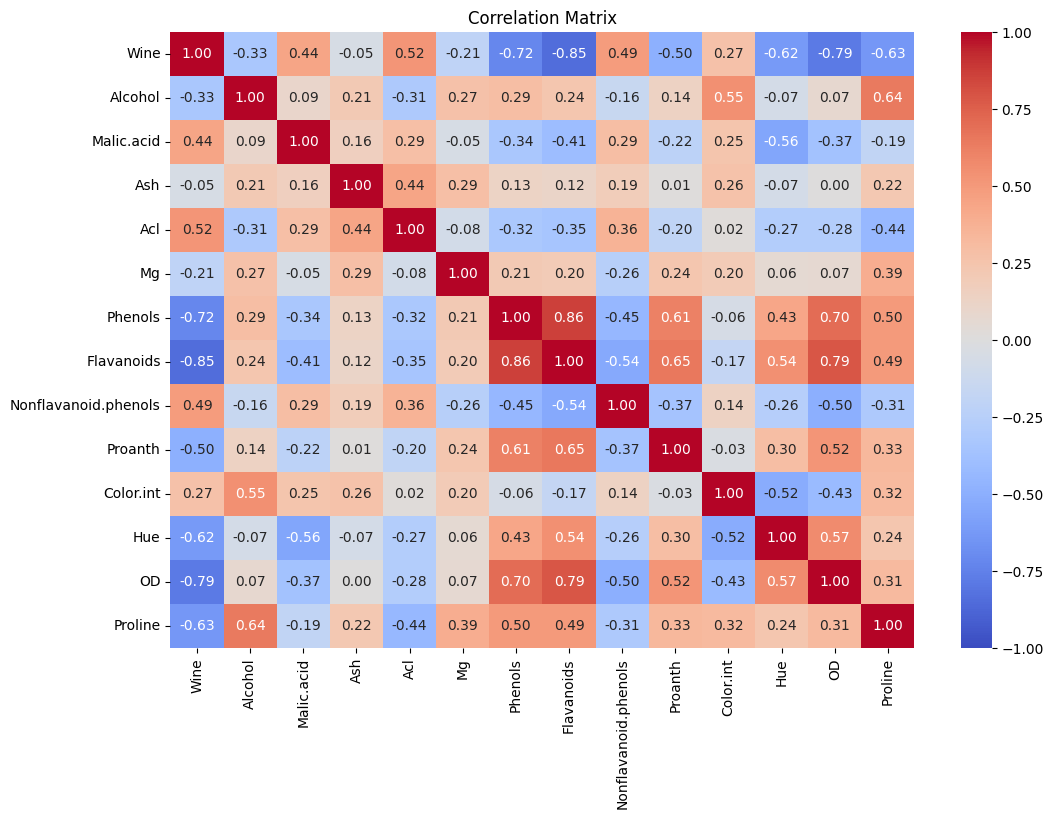

In [6]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Wine Grade 각 Feature 별 분포 시각화

<ipython-input-7-01eba8967551>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Wine', y=feature, palette='muted', inner='quartile')
<ipython-input-7-01eba8967551>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Wine', y=feature, palette='muted', inner='quartile')
<ipython-input-7-01eba8967551>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Wine', y=feature, palette='muted', inner='quartile')
<ipython-input-7-01eba8967551>:4: FutureWarning: 

Passing `palette` without assigning `hue` is depreca

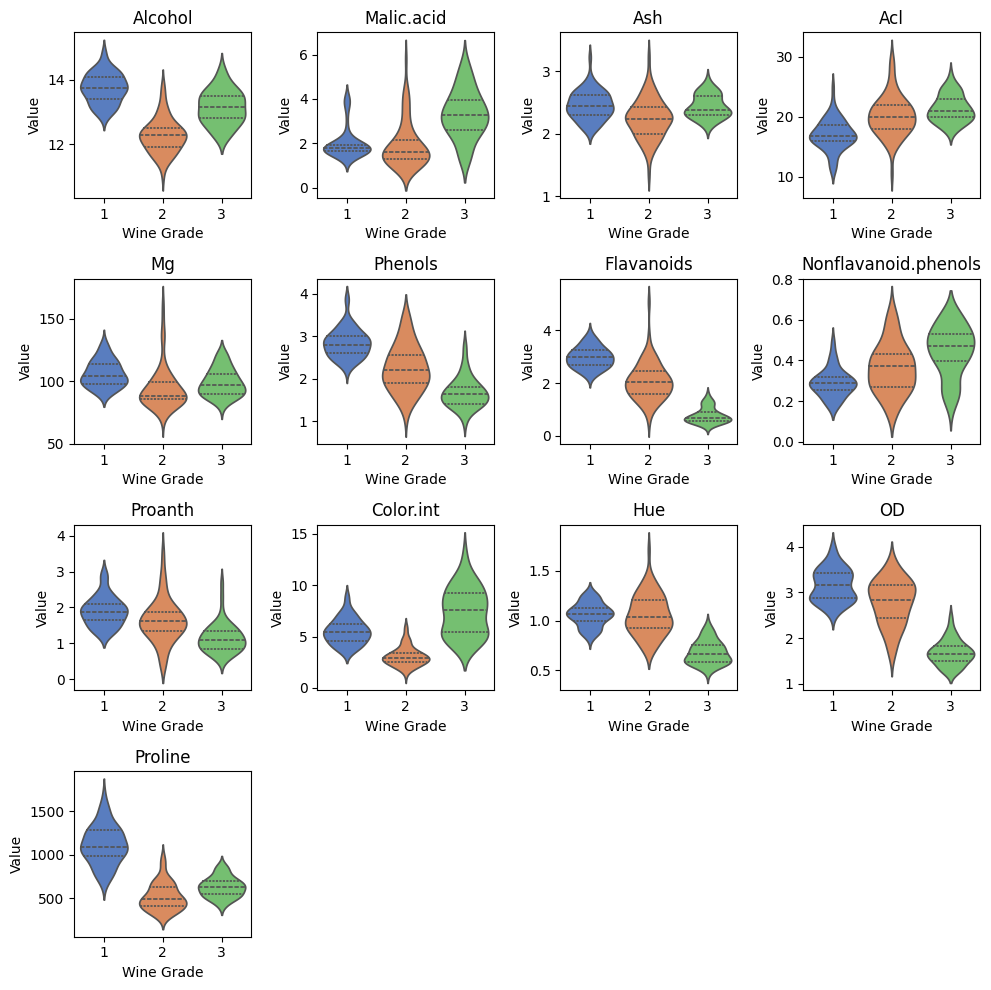

In [7]:
plt.figure(figsize=(10, 10))
for i, feature in enumerate(df.columns[1:]):  # Wine 제외
    plt.subplot(4, 4, i + 1)
    sns.violinplot(data=df, x='Wine', y=feature, palette='muted', inner='quartile')
    plt.title(feature)
    plt.xlabel('Wine Grade')
    plt.ylabel('Value')
plt.tight_layout()
plt.show()

- 시각화 했을 때 보이는 높은 상관 관계를 갖는 feature는 Acl, Phenols , Flavanoids, Nonflavanoid.phenols, Proanth, Hue, OD 인 듯하다   
- 1,2,3이 순차적으로 나열된형태를 가지거나 역순차적인 순서를 나타내야하는데 이 feature들이 그 결과 값을 잘 반영한 듯하다.
- 상관관계 혼동행렬에서 상관관계를 Heatmap으로 시각화했는데 이것은 그 절대값이 크면 상관관계가 크지 않나 싶다

In [8]:
X=df.drop('Wine',axis=1)
X.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
y=df['Wine']
y.value_counts()

,count
Wine,
2,71
1,59
3,48


In [10]:
y.head()

,Wine
0,1
1,1
2,1
3,1
4,1


In [13]:
Y = pd.get_dummies(y).values
X = X.values

In [11]:
X

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


##### 데이터 분할

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

#### 하이퍼파라미터 튜닝 (은닉층 및 유닛 수 / 학습률 / 배치 크기 / 에폭 수)
- 은닉층 및 유닛 수는 모델의 복잡도 관리
- 최적화 알고리즘은 Adam으로 고정
- 손실함수는 카테고리형으로 고정
- 배치크기 / 학습률 / 에폭 수/ 은닉층 및 유닛 수를 조정해서 비교

##### 하이퍼파라미터 튜닝 모델 각각 컴파일

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

model_base = Sequential() # 기본 구조 은닉층 1 모양 없음

model_base.add(Dense(9,input_shape=(13,),activation='relu'))
model_base.add(Dense(6,activation='relu'))
model_base.add(Dense(3,activation='softmax'))

model_base.compile(optimizer=Adam(learning_rate=0.05),loss='categorical_crossentropy',metrics=['accuracy'])

model_base.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 9)                   │             126 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 207 (828.00 B)

 Trainable params: 207 (828.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
model_hidlayer = Sequential() # 은닉층 수 조정 (유닛 수: 마름모 꼴)+ 학습률 조절

model_hidlayer.add(Dense(3,input_shape=(13,),activation='relu'))
model_hidlayer.add(Dense(32,activation='relu'))
model_hidlayer.add(Dense(64,activation='relu'))
model_hidlayer.add(Dense(128,activation='relu'))
model_hidlayer.add(Dense(64,activation='relu'))
model_hidlayer.add(Dense(32,activation='relu'))
model_hidlayer.add(Dense(3,activation='softmax')) # 은닉층 수 3

model_hidlayer.compile(optimizer=Adam(learning_rate=5e-3),loss='categorical_crossentropy',metrics=['accuracy'])

model_hidlayer.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 3)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,037 (82.18 KB)

 Trainable params: 21,037 (82.18 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model_batchsize = Sequential() # 은닉층 수 조정 + 배치 수 조절 + 학습률 조절

model_batchsize.add(Dense(3,input_shape=(13,),activation='relu'))
model_batchsize.add(Dense(32,activation='relu'))
model_batchsize.add(Dense(64,activation='relu'))
model_batchsize.add(Dense(64,activation='relu'))
model_batchsize.add(Dense(32,activation='relu'))
model_batchsize.add(Dense(3,activation='softmax')) # 은닉층 수 3

model_batchsize.compile(optimizer=Adam(learning_rate=5e-3),loss='categorical_crossentropy',metrics=['accuracy'])

model_batchsize.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 3)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 32)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,621 (33.68 KB)

 Trainable params: 8,621 (33.68 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
print(X_train.shape)
print(X_test.shape)

(142, 13)
(36, 13)


##### 모델 별 학습

가장 기본적인 모델  
- 은닉층 = 1
- ecpochs = 30
- batch_size = 30
- 학습률 = 0.04

In [19]:
base_history=model_base.fit(x=X_train, y=y_train, epochs=30, batch_size=32, validation_data= (X_test,y_test))
y_pred = model_base.predict(X_test)

y_test_base = np.argmax(y_test,axis=1)
y_pred_base = np.argmax(y_pred,axis=1)

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 379ms/step - accuracy: 0.2869 - loss: 106.4905 - val_accuracy: 0.1944 - val_loss: 5.4473
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.2302 - loss: 3.8933 - val_accuracy: 0.4444 - val_loss: 1.1264
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3917 - loss: 1.1207 - val_accuracy: 0.4444 - val_loss: 1.1174
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3709 - loss: 1.1256 - val_accuracy: 0.4444 - val_loss: 1.1059
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3713 - loss: 1.1188 - val_accuracy: 0.4444 - val_loss: 1.0950
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3787 - loss: 1.1098 - val_accuracy: 0.4444 - val_loss: 1.0843
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3596 - loss: 1.1073 - val_accuracy: 0.4444 - val_loss: 1.0788
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4334 - loss: 1.0796 - val_accuracy: 0.4444 - val_loss: 1.07

하이퍼 파라미터 中 은닉층및 유닛 수 마름모 꼴로 수정  + 학습률 변경
- 은닉층 = 3
- ecpochs = 30
- batch_size = 32
- 학습률 = 5e-1

In [20]:
hidlayer_history=model_hidlayer.fit(x=X_train, y=y_train, epochs=30, batch_size=32, validation_data= (X_test,y_test))
y_pred = model_hidlayer.predict(X_test)

y_test_hidlayer = np.argmax(y_test,axis=1)
y_pred_hidlayer = np.argmax(y_pred,axis=1)

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 629ms/step - accuracy: 0.2393 - loss: 14.4983 - val_accuracy: 0.3889 - val_loss: 1.9769
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3932 - loss: 1.7626 - val_accuracy: 0.5556 - val_loss: 0.8665
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4998 - loss: 0.9700 - val_accuracy: 0.4444 - val_loss: 0.9122
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4206 - loss: 1.0132 - val_accuracy: 0.2778 - val_loss: 1.2961
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4394 - loss: 1.1320 - val_accuracy: 0.4722 - val_loss: 0.8716
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4772 - loss: 0.9429 - val_accuracy: 0.6389 - val_loss: 0.8501
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4860 - loss: 0.9673 - val_accuracy: 0.6111 - val_loss: 0.7204
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5947 - loss: 0.8149 - val_accuracy: 0.5833 - val_loss: 0.726

하이퍼 파라미터 전체적 조정  ( 은닉층 : 정사각형 꼴 배치수 늘리고, 학습률 늘리고)
- 은닉층 = 3
- ecpochs = 100
- batch_size = 100
- 학습률 = 5e-3

In [21]:
batch_history=model_batchsize.fit(x=X_train, y=y_train, epochs=100, batch_size=100, validation_data= (X_test,y_test))
y_pred = model_batchsize.predict(X_test)

y_test_batch = np.argmax(y_test,axis=1)
y_pred_batch = np.argmax(y_pred,axis=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.3113 - loss: 25.5980 - val_accuracy: 0.4444 - val_loss: 6.7667
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.3728 - loss: 6.0654 - val_accuracy: 0.1667 - val_loss: 2.5145
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.3066 - loss: 2.0097 - val_accuracy: 0.4444 - val_loss: 1.5335
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.4311 - loss: 1.9250 - val_accuracy: 0.3889 - val_loss: 1.4223
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.3179 - loss: 1.8669 - val_accuracy: 0.4444 - val_loss: 1.0147
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.3279 - loss: 1.1549 - val_accuracy: 0.1667 - val_loss: 1.6611
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.3547 - loss: 1.2999 - val_accuracy: 0.6111 - val_loss: 0.8326
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5315 - loss: 1.0702 - val_accuracy: 0.6944 - val_los

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 255ms/step


딕셔너리를 통한 각 모델 시각화

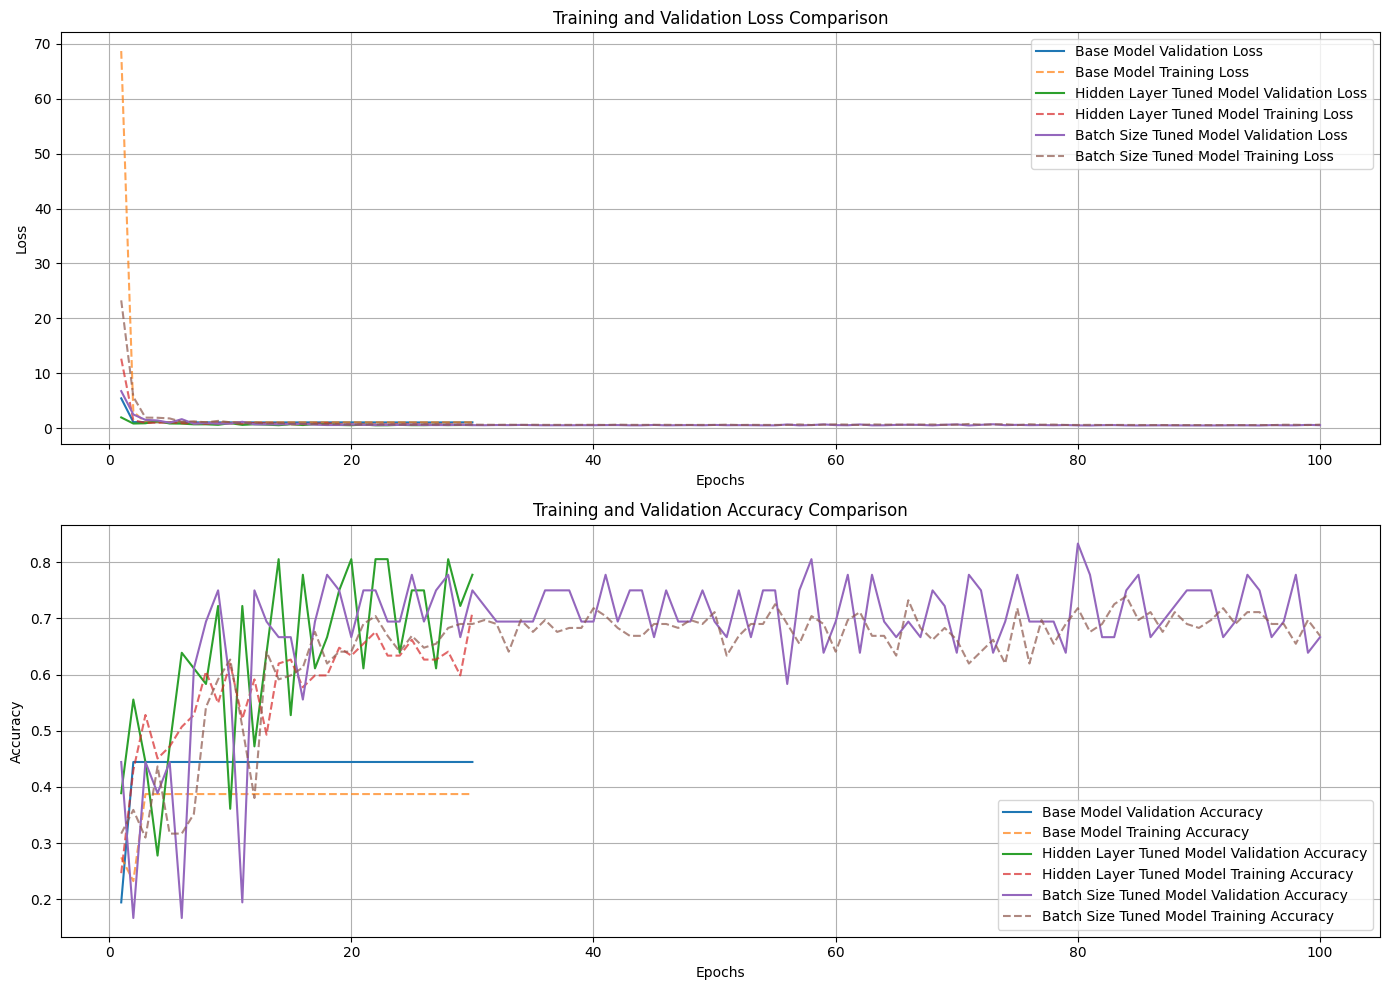

In [22]:
import matplotlib.pyplot as plt

# 데이터 준비
histories = {
    "Base Model": base_history,
    "Hidden Layer Tuned Model": hidlayer_history,
    "Batch Size Tuned Model": batch_history
}

# Subplot 생성
plt.figure(figsize=(14, 10))  # 전체 그림 크기 설정

# 1번 그래프: 손실 비교
plt.subplot(2, 1, 1)  # 2행 1열 중 첫 번째 그래프
for name, history in histories.items():
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, val_loss, label=f'{name} Validation Loss')
    plt.plot(epochs, loss, linestyle='--', alpha=0.7, label=f'{name} Training Loss')

plt.title('Training and Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# 2번 그래프: 정확도 비교
plt.subplot(2, 1, 2)  # 2행 1열 중 두 번째 그래프
for name, history in histories.items():
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, val_acc, label=f'{name} Validation Accuracy')
    plt.plot(epochs, acc, linestyle='--', alpha=0.7, label=f'{name} Training Accuracy')

plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# 전체 그래프 표시
plt.tight_layout()  # 그래프 간격 자동 조정
plt.show()